# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2383 Борисов Иван Вадимович и Сыздыков Нургалым Конакбаевич. Вариант №8.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

В работе рассматривается непрерывный аналоговый сигнал, представляющий собой линейную комбинацию косинусоид вида:

$$
x(t) = \sum_{k=0}^{10} A_k \cos(\omega_k t + \varphi_k),
$$

Амплитуды гармоник $A_k$ представляют собой целые числа от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел.

Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$.

Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$.

Дискретный сигнал формируется посредством дискретизации с шагом $T = 1$.

Дискретная последовательность включает в себя 32 отсчета ($N = 31$):

$$
x[n] = x(t=n) = \sum_{k=0}^{10} A_k \cos(\omega_k n + \varphi_k), \quad n=0,1,\dots,31.
$$

### Дискретное преобразование Фурье

Рассмотрим периодический дискретный сигнал $x[n]$. Коэффициенты его спектра можно получить с помощью дискретного преобразования Фурье (ДПФ):

$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}$$

где $k$ — номер гармоники, $\omega_k = \frac{2\pi k}{N}$ — соответствующая круговая частота.

### Нерекурсивные фильтры

В работе используются нерекурсивные фильтры (FIR-фильтры) с симметричными коэффициентами $h_k = h_{-k}$. Их передаточная функция имеет вид:

$$H(\omega) = h_0 + 2\sum_{k=1}^{m} h_k \cos(k\omega)$$

где $h_k$ — коэффициенты фильтра, зависящие от метода сглаживания (линейное или полиномиальное).

**1. Линейное сглаживание:**

$$h_k = \frac{1}{2m+1}$$


**2. Сглаживание полиномом 2-й степени:**
* По 5 точкам ($m=2$): $h = \frac{1}{35}[-3, 12, 17, 12, -3]$
* По 9 точкам ($m=4$): $h = \frac{1}{231}[-21, 14, 39, 54, 59, 54, 39, 14, -21]$

**3. Сглаживание полиномом 4-й степени:**
* По 7 точкам ($m=3$): $h = \frac{1}{231}[5, -30, 75, 131, 75, -30, 5]$
* По 11 точкам ($m=5$): $h = \frac{1}{429}[18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$ Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

2. Визуализировать исходные аналоговый и дискретизированный сигналы.

3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

8. Повторить п. 4–7 для следующих фильтров:
- Сглаживание полиномом 2-ой степени по 5 и 9 узлам.
- Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

9. Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.


## Выполнение работы

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

np.random.seed(4)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)


### Задание 1
Сформулировать дискретный сигнал

In [2]:
K = 11  # Количество гармоник (k = 0..10)
N = 32  # Количество отсчетов дискретного сигнала
T = 1   # Шаг дискретизации
# Частоты: от 0 до pi с шагом 0.1pi
# w_k = k * 0.1 * pi
omegas = np.arange(0, K) * 0.1 * np.pi

# Амплитуды: случайные целые от 1 до 11
A_raw = np.random.randint(1, 12, size=K)
# Нормализация амплитуд (сумма должна быть равна 1)
A = A_raw  / np.sum(A_raw)

# Фазы: случайные от 0 до 0.5
phi = np.random.uniform(0, 0.5, size=K)

print(f'Частоты\n {np.round(omegas, 3)}')
print(f'Фазы\n {np.round(phi, 3)}')
print(f'Амплитуды\n {np.round(A, 3)}')

print('\n11 гармоник')
for (a, omega, ph) in zip(np.round(A, 3), omegas, np.round(phi, 3)):
    display(Latex(
        f'{a} \\, cos({round(omega / np.pi, 5)} \\pi t + {ph})'
    ))

Частоты
 [0.    0.314 0.628 0.942 1.257 1.571 1.885 2.199 2.513 2.827 3.142]
Фазы
 [0.112 0.349 0.452 0.316 0.003 0.286 0.181 0.302 0.196 0.406 0.306]
Амплитуды
 [0.129 0.094 0.071 0.024 0.106 0.094 0.106 0.035 0.118 0.129 0.094]

11 гармоник


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
# Функция для генерации непрерывного сигнала s(t)
def s(t):
    # Сумма 11 гармоник
    return np.sum(A * np.cos(omegas * t + phi))

# Дискретный сигнал
n_indices = np.arange(N)
t_discrete = n_indices * T
s_discrete = np.array([s(t) for t in t_discrete])

# Аналоговый сигнал (для плавного графика возьмем больше точек)
t_analog = np.linspace(0, N - 1, 1000)
s_analog = np.array([s(t) for t in t_analog])

### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

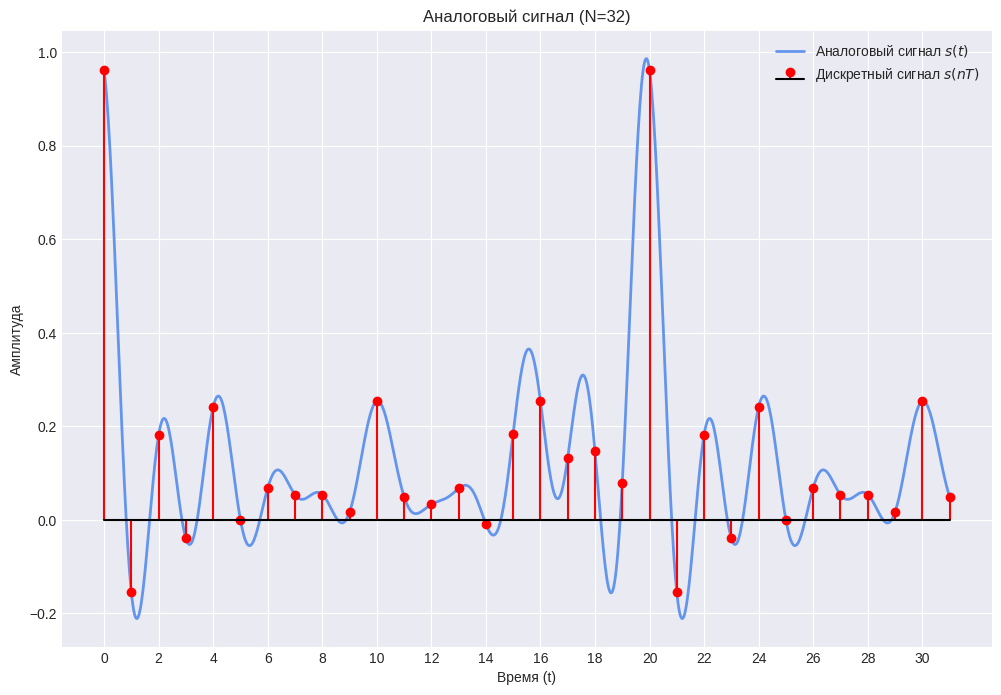

In [4]:
plt.figure()
plt.plot(
    t_analog,
    s_analog,
    label='Аналоговый сигнал $s(t)$',
    color='cornflowerblue',
    linewidth=2,
)
plt.stem(
    t_discrete,
    s_discrete,
    linefmt='r-',
    markerfmt='ro',
    basefmt='k-',
    label='Дискретный сигнал $s(nT)$',
)
plt.title(f'Аналоговый сигнал (N={N})')
plt.xlabel('Время (t)')
plt.ylabel('Амплитуда')
plt.xticks(np.arange(0, N, 2))
plt.legend()
plt.grid(True)
plt.show()

### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

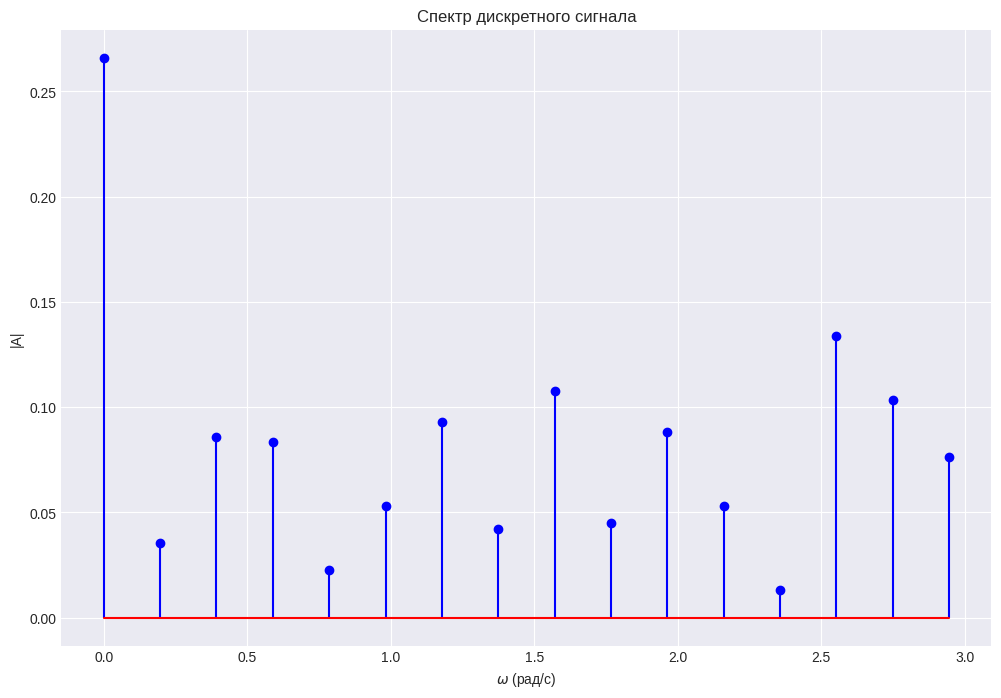

In [5]:
# np.fft.fftfreq возвращает частоты в циклах/отсчет.
# Умножаем на 2*pi, чтобы получить круговую частоту (рад/с).
# Берем первую половину [:N // 2], так как спектр симметричен.
W = np.fft.fftfreq(N, d=T)[:N // 2] * 2 * np.pi


# Умножаем на 2, чтобы получить реальные амплитуды синусоид
F = np.fft.fft(s_discrete, norm='forward')[:N // 2] * 2


plt.figure()
plt.stem(W, np.abs(F), basefmt="r-", linefmt='b-', markerfmt='bo')

plt.title('Спектр дискретного сигнала')
plt.xlabel(r'$\omega$ (рад/с)')
plt.ylabel('|A|')
plt.grid(True)
plt.show()

### Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ - передаточной функции (частотной характеристики) фильтра.

Линейное сглаживание по $2m+1$ точкам соответствует нерекурсивному фильтру с равными коэффициентами $h_k = \frac{1}{2m+1}$.
Передаточная функция симметричного фильтра: $H(\omega) = h_0 + 2\sum_{k=1}^{m} h_k \cos(k\omega)$.

**Формула для сглаживания по 5 точкам ($m=2$):**
$$H_5(\omega) = \frac{1}{5} \left( 1 + 2\cos(\omega) + 2\cos(2\omega) \right)$$

**Формула для сглаживания по 9 точкам ($m=4$):**
$$H_9(\omega) = \frac{1}{9} \left( 1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega) + 2\cos(4\omega) \right)$$

In [6]:
def linear_smoothing(S, points) -> np.array:
    m = (points - 1) // 2
    y = [np.sum(S[i-m : i+m+1]) / points for i in range(m, len(S) - m)]
    return np.array([0] * m + y + [0] * m)


y_5_linear = linear_smoothing(s_discrete, 5)
y_9_linear = linear_smoothing(s_discrete, 9)

### Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

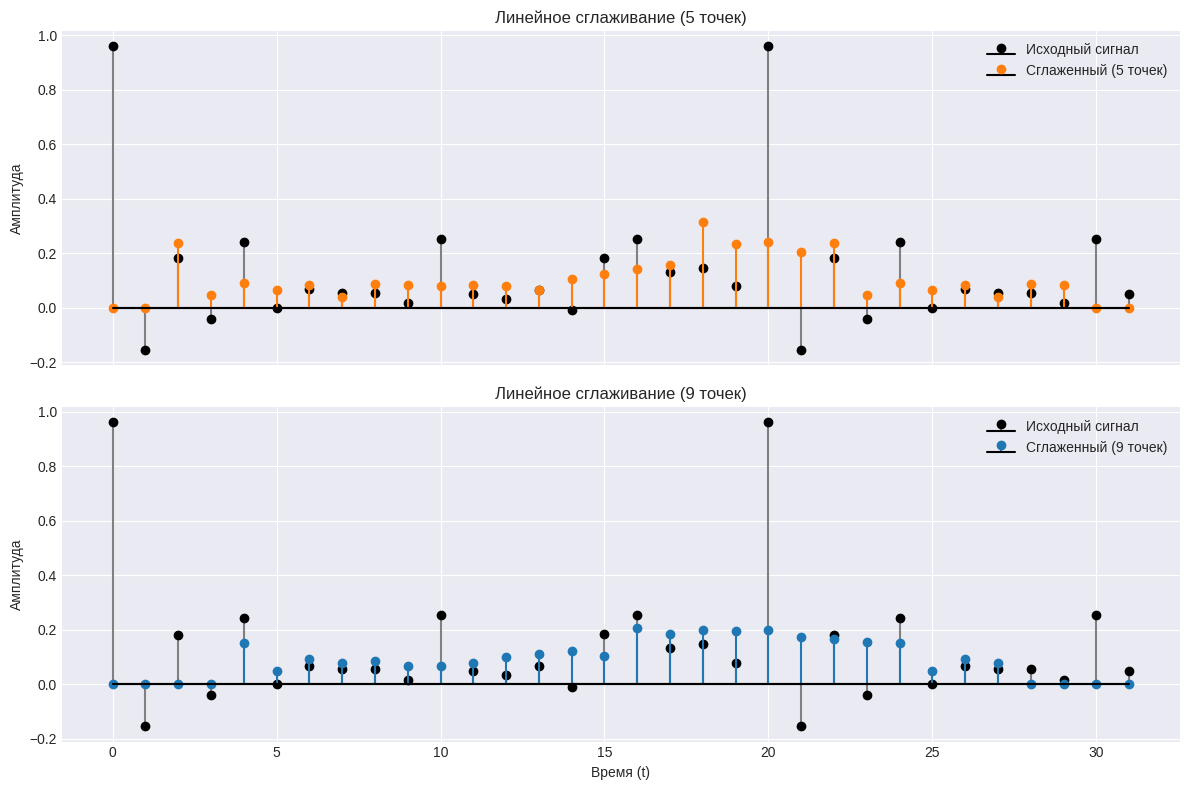

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.set_title('Линейное сглаживание (5 точек)')
ax1.stem(n_indices, s_discrete, linefmt='grey', markerfmt='ko', basefmt='k-', label='Исходный сигнал')
ax1.stem(n_indices, y_5_linear, linefmt='C1-', markerfmt='C1o', basefmt='k-', label='Сглаженный (5 точек)')
ax1.set_ylabel('Амплитуда')
ax1.legend()
ax1.grid(True)


ax2.set_title('Линейное сглаживание (9 точек)')
ax2.stem(n_indices, s_discrete, linefmt='grey', markerfmt='ko', basefmt='k-', label='Исходный сигнал')
ax2.stem(n_indices, y_9_linear, linefmt='C0-', markerfmt='C0o', basefmt='k-', label='Сглаженный (9 точек)')
ax2.set_xlabel('Время (t)')
ax2.set_ylabel('Амплитуда')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

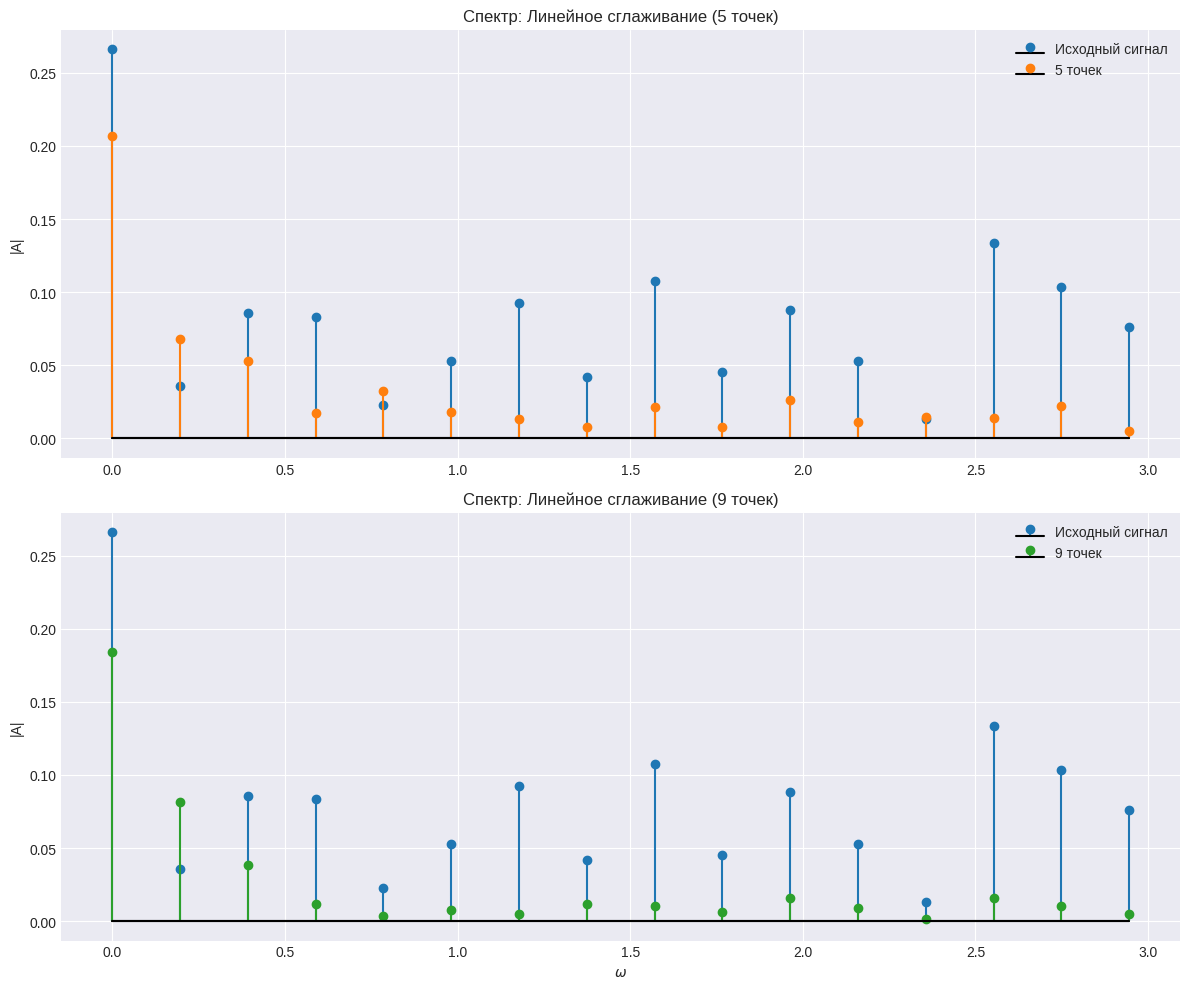

In [8]:
F_5_linear = np.fft.fft(y_5_linear, norm='forward')[:N // 2] * 2
F_9_linear = np.fft.fft(y_9_linear, norm='forward')[:N // 2] * 2


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.set_title('Спектр: Линейное сглаживание (5 точек)')
ax1.stem(W, np.abs(F), linefmt='C0-', markerfmt='C0o', basefmt='k-', label='Исходный сигнал')
ax1.stem(W, np.abs(F_5_linear), linefmt='C1-', markerfmt='C1o', basefmt='k-', label='5 точек')
ax1.set_ylabel('|A|')
ax1.legend()
ax1.grid(True)


ax2.set_title('Спектр: Линейное сглаживание (9 точек)')
ax2.stem(W, np.abs(F), linefmt='C0-', markerfmt='C0o', basefmt='k-', label='Исходный сигнал')
ax2.stem(W, np.abs(F_9_linear), linefmt='C2-', markerfmt='C2o', basefmt='k-', label='9 точек')
ax2.set_xlabel(r'$\omega$')
ax2.set_ylabel('|A|')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

В результате применения фильтра линейного сглаживания подавляются высокие частоты, что характерно для фильтра нижних частот (ФНЧ).

1.  **Сглаживание по 5 точкам:** Полоса пропускания шире. Высокочастотные гармоники ослабляются, но не подавляются полностью.
2.  **Сглаживание по 9 точкам:** Полоса пропускания уже. Подавление высоких частот происходит сильнее.

Изменение спектра сигнала полностью согласуется с графиком частотной характеристики $H(\omega)$: чем больше точек сглаживания, тем сильнее фильтрация.

### Задание 8

Повторить п. 4-7 для следующих фильтров:

    сглаживание полиномом второй степени по пяти и девяти узлам;
    
    сглаживание полиномом четвёртой степени по семи и одиннадцати узлам.

In [9]:
def polynomial_smoothing(S, degree, points):
    coeffs_dict = {
        (2, 5): np.array([-3, 12, 17, 12, -3]) / 35,
        (2, 9): np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231,
        (4, 7): np.array([5, -30, 75, 131, 75, -30, 5]) / 231,
        (4, 11): np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429
    }

    h = coeffs_dict[(degree, points)]
    m = (points - 1) // 2

    y_full = np.convolve(S, h, mode='same')
    y_full[:m] = 0
    y_full[-m:] = 0

    return y_full


y_p2_5 = polynomial_smoothing(s_discrete, degree=2, points=5)
y_p2_9 = polynomial_smoothing(s_discrete, degree=2, points=9)

### Сглаживание полиномом 2-й степени

Передаточная функция: $H(\omega) = h_0 + 2\sum_{k=1}^{m} h_k \cos(k\omega)$.

По 5 точкам ($m=2$, нормирующий множитель 1/35).

Коэффициенты: $[-3, 12, 17, 12, -3]$.
$$y_n = \frac{1}{35}(-3s_{n-2}+12s_{n-1}+17s_n+12s_{n+1}-3s_{n+2})$$
$$H(\omega)=\frac{1}{35}(17+24\cos(\omega)-6\cos(2\omega))$$

По 9 точкам ($m=4$, нормирующий множитель 1/231).

Коэффициенты: $[-21, 14, 39, 54, 59, 54, 39, 14, -21]$.
$$y_n=\frac{1}{231}(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_n+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4})$$
$$H(\omega)=\frac{1}{231}(59+108\cos(\omega)+78\cos(2\omega)+28\cos(3\omega)-42\cos(4\omega))$$

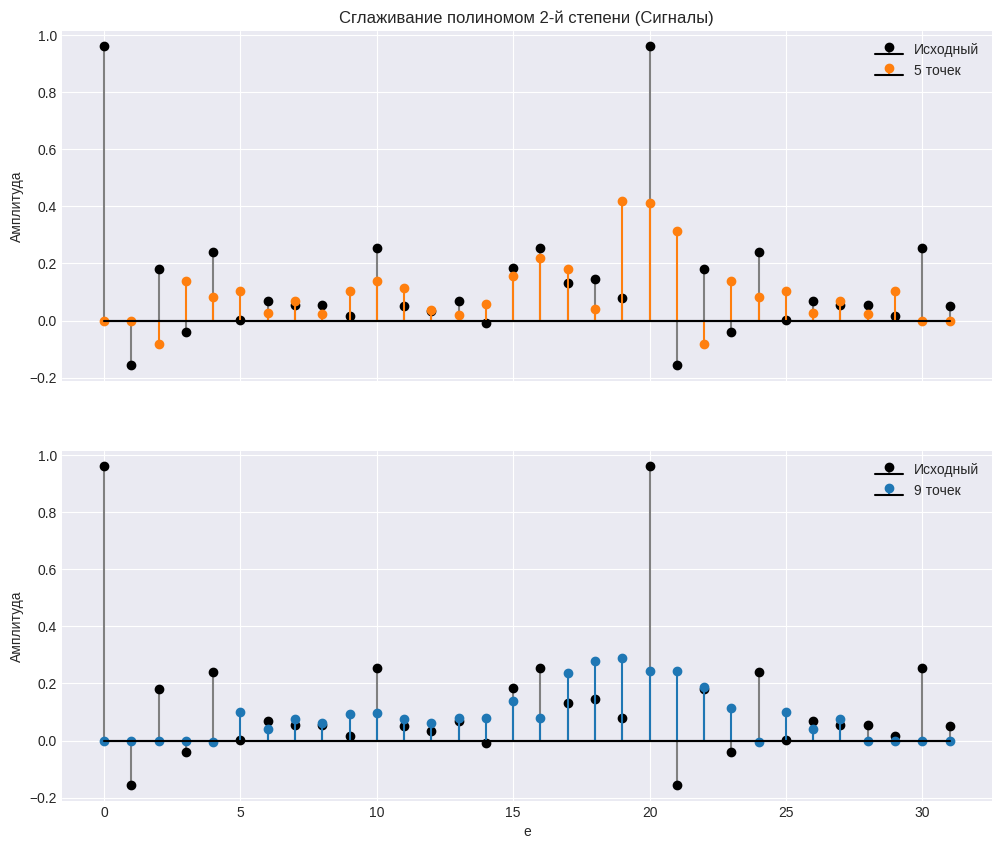

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
ax1.set_title('Сглаживание полиномом 2-й степени (Сигналы)')

# 5 точек
ax1.stem(n_indices, s_discrete, linefmt='grey', markerfmt='ko', basefmt='k-', label='Исходный')
ax1.stem(n_indices, y_p2_5, linefmt='C1-', markerfmt='C1o', basefmt='k-', label='5 точек')
ax1.set_ylabel('Амплитуда'); ax1.legend(); ax1.grid(True)

# 9 точек
ax2.stem(n_indices, s_discrete, linefmt='grey', markerfmt='ko', basefmt='k-', label='Исходный')
ax2.stem(n_indices, y_p2_9, linefmt='C0-', markerfmt='C0o', basefmt='k-', label='9 точек')
ax2.set_xlabel('е'); ax2.set_ylabel('Амплитуда'); ax2.legend(); ax2.grid(True)
plt.show()

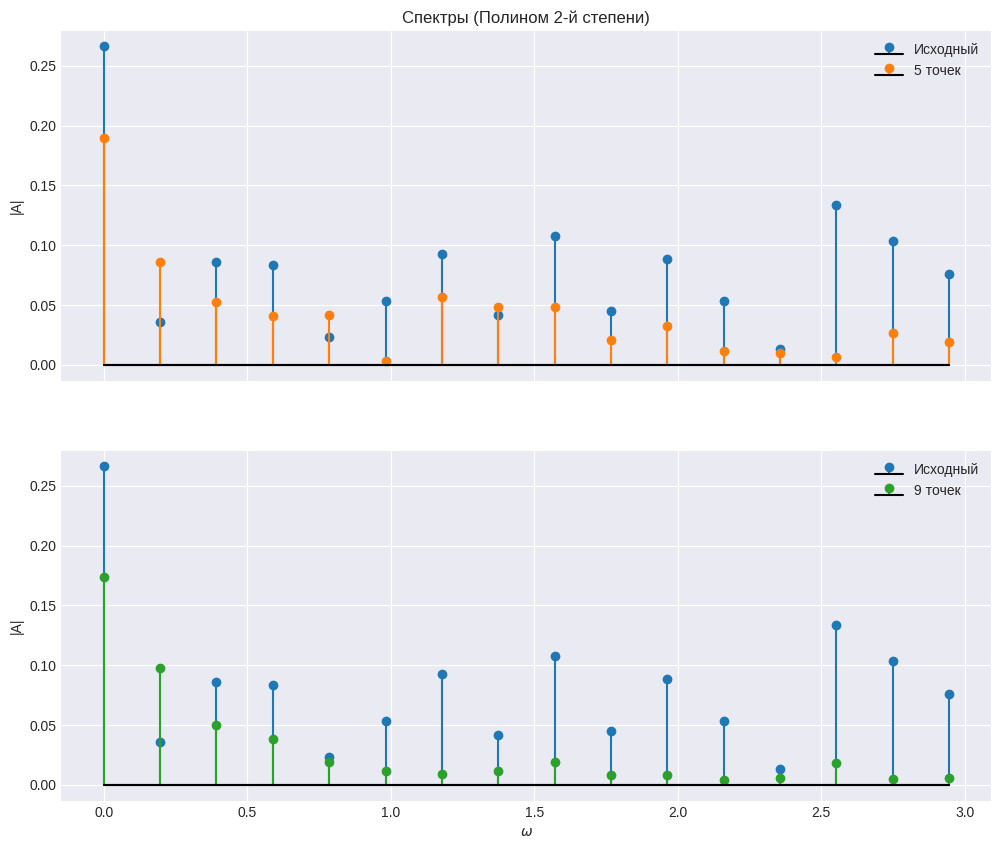

In [11]:
F_p2_5 = np.fft.fft(y_p2_5, norm='forward')[:N // 2] * 2
F_p2_9 = np.fft.fft(y_p2_9, norm='forward')[:N // 2] * 2

fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
ax3.set_title('Спектры (Полином 2-й степени)')

# Спектр 5 точек
ax3.stem(W, np.abs(F), linefmt='C0-', markerfmt='C0o', basefmt='k-', label='Исходный')
ax3.stem(W, np.abs(F_p2_5), linefmt='C1-', markerfmt='C1o', basefmt='k-', label='5 точек')
ax3.set_ylabel('|A|'); ax3.legend(); ax3.grid(True)

# Спектр 9 точек
ax4.stem(W, np.abs(F), linefmt='C0-', markerfmt='C0o', basefmt='k-', label='Исходный')
ax4.stem(W, np.abs(F_p2_9), linefmt='C2-', markerfmt='C2o', basefmt='k-', label='9 точек')
ax4.set_xlabel(r'$\omega$'); ax4.set_ylabel('|A|'); ax4.legend(); ax4.grid(True)
plt.show()

Сравнивая результаты сглаживания полиномом 2-й степени с линейным сглаживанием, можно сделать следующие выводы:

1.  Ширина полосы пропускания: При одинаковом количестве точек, фильтр на основе полинома 2-й степени имеет более широкую полосу пропускания. На спектрах это проявляется в том, что высокочастотные гармоники ослабляются слабее, чем при линейном сглаживании. Линейный фильтр действует более агрессивно, сильнее подавляя высокие частоты.
2.  Влияние длины окна: Как и в случае с линейным фильтром, увеличение количества точек сглаживания (с 5 до 9) приводит к сужению полосы пропускания. Спектр для 9 точек (зеленый) показывает более сильное подавление высоких частот по сравнению со спектром для 5 точек (оранжевый).
3.  Искажение сигнала: Благодаря более широкой полосе, полиномиальный фильтр лучше сохраняет крутизну фронтов и форму пиков исходного сигнала, внося меньше искажений в полезную (низкочастотную) часть спектра.

### Сглаживание полиномом 4-й степени

Передаточная функция: $H(\omega) = h_0 + 2\sum_{k=1}^{m} h_k \cos(k\omega)$.

По 7 точкам ($m=3$, нормирующий множитель 1/231).

Коэффициенты: $[5, -30, 75, 131, 75, -30, 5]$.
$$y_n=\frac{1}{231}(5s_{n-3}-30s_{n-2}+75s_{n-1}+131s_n+75s_{n+1}-30s_{n+2}+5s_{n+3})$$
$$H(\omega)=\frac{1}{231}(131+150\cos(\omega)-60\cos(2\omega)+10\cos(3\omega))$$

По 11 точкам ($m=5$, нормирующий множитель 1/429).

Коэффициенты: $[18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]$.
$$y_n=\frac{1}{429}(18s_{n-5}-45s_{n-4}-10s_{n-3}+60s_{n-2}+120s_{n-1}+143s_n+120s_{n+1}+60s_{n+2}-10s_{n+3}-45s_{n+4}+18s_{n+5})$$
$$H(\omega)=\frac{1}{429}(143+240\cos(\omega)+120\cos(2\omega)-20\cos(3\omega)-90\cos(4\omega)+36\cos(5\omega))$$

In [12]:
y_p4_7 = polynomial_smoothing(s_discrete, 4, 7)
y_p4_11 = polynomial_smoothing(s_discrete, 4, 11)

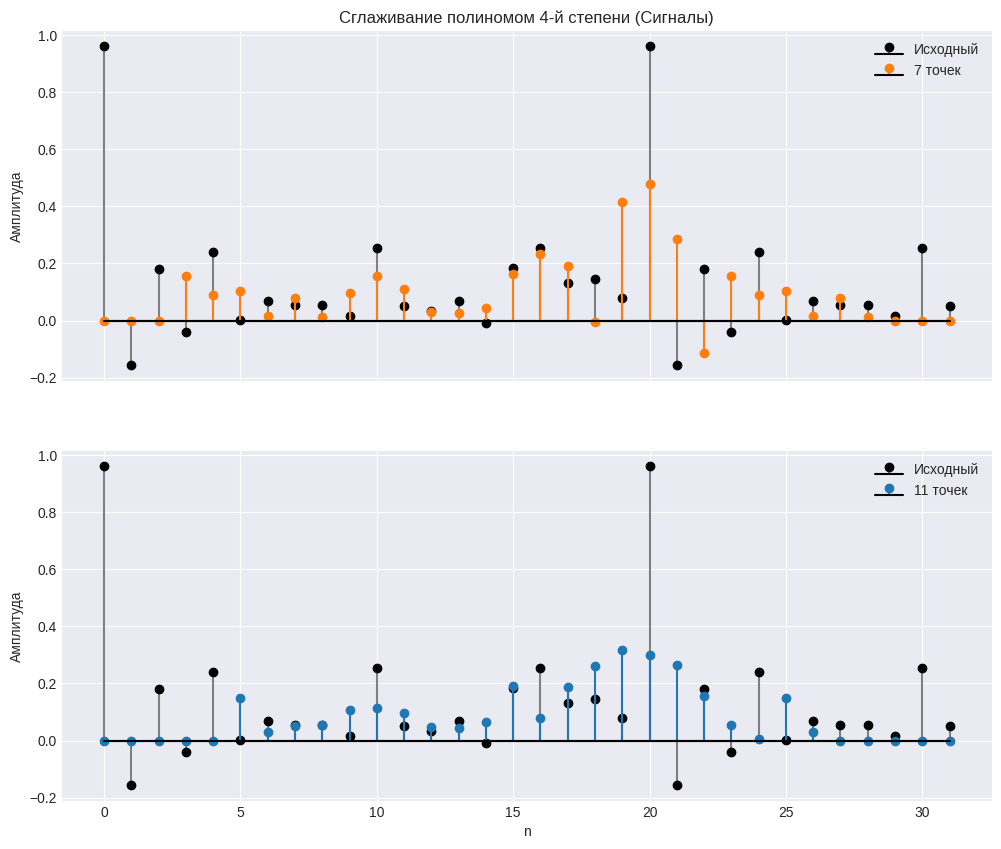

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
ax1.set_title('Сглаживание полиномом 4-й степени (Сигналы)')

# 7 точек
ax1.stem(n_indices, s_discrete, linefmt='grey', markerfmt='ko', basefmt='k-', label='Исходный')
ax1.stem(n_indices, y_p4_7, linefmt='C1-', markerfmt='C1o', basefmt='k-', label='7 точек')
ax1.set_ylabel('Амплитуда'); ax1.legend(); ax1.grid(True)

# 11 точек
ax2.stem(n_indices, s_discrete, linefmt='grey', markerfmt='ko', basefmt='k-', label='Исходный')
ax2.stem(n_indices, y_p4_11, linefmt='C0-', markerfmt='C0o', basefmt='k-', label='11 точек')
ax2.set_xlabel('n'); ax2.set_ylabel('Амплитуда'); ax2.legend(); ax2.grid(True)
plt.show()

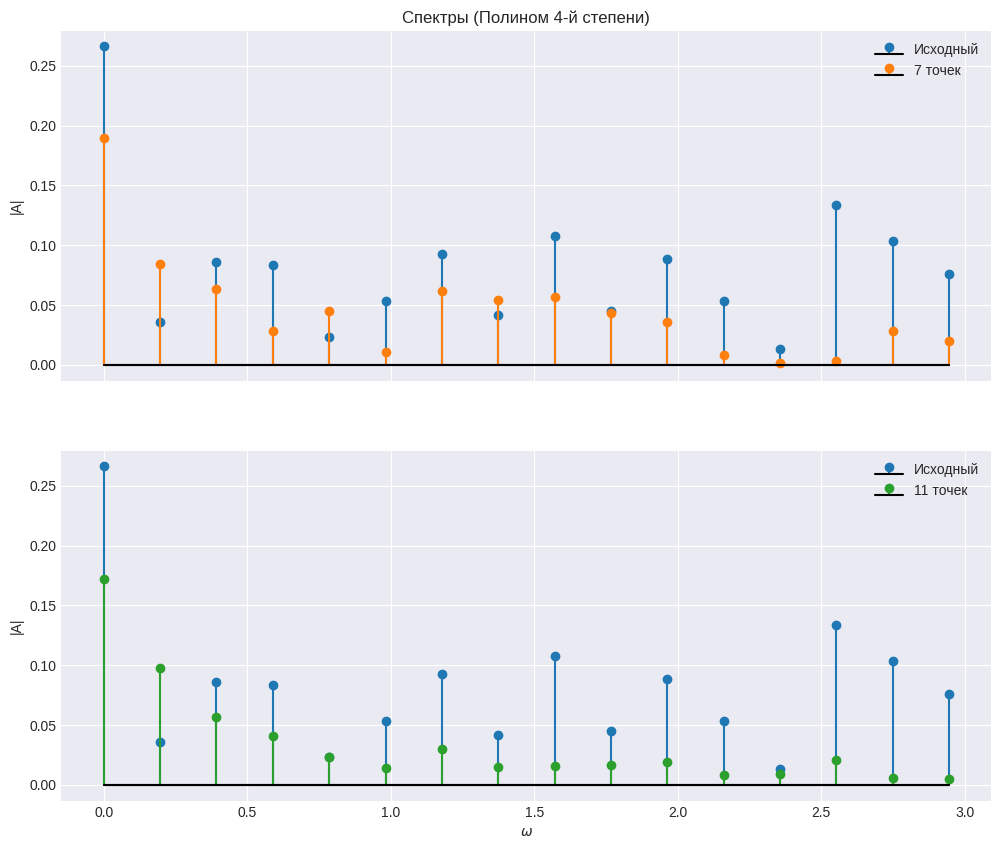

In [14]:
F_p4_7 = np.fft.fft(y_p4_7, norm='forward')[:N // 2] * 2
F_p4_11 = np.fft.fft(y_p4_11, norm='forward')[:N // 2] * 2

fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
ax3.set_title('Спектры (Полином 4-й степени)')

ax3.stem(W, np.abs(F), linefmt='C0-', markerfmt='C0o', basefmt='k-', label='Исходный')
ax3.stem(W, np.abs(F_p4_7), linefmt='C1-', markerfmt='C1o', basefmt='k-', label='7 точек')
ax3.set_ylabel('|A|'); ax3.legend(); ax3.grid(True)

ax4.stem(W, np.abs(F), linefmt='C0-', markerfmt='C0o', basefmt='k-', label='Исходный')
ax4.stem(W, np.abs(F_p4_11), linefmt='C2-', markerfmt='C2o', basefmt='k-', label='11 точек')
ax4.set_xlabel(r'$\omega$'); ax4.set_ylabel('|A|'); ax4.legend(); ax4.grid(True)
plt.show()

С повышением степени полинома до 4-й, фильтр становится еще более прозрачным для полезного сигнала. Полоса пропускания расширяется, и фильтр практически не искажает амплитуды гармоник в низкочастотной и средней части спектра. Подавление происходит только на самых высоких частотах. При увеличении количества точек сглаживания (с 7 до 11) эффективность подавления высокочастотного шума возрастает, но при этом сохраняется высокая точность передачи основной формы сигнала.

## Выводы

В ходе лабораторной работы был сформирован и дискретизирован сигнал, состоящий из суммы косинусоид. Для него был построен спектр с помощью ДПФ и исследовано влияние различных нерекурсивных фильтров сглаживания.

Были применены три типа фильтрации.
1.  Линейное сглаживание (5 и 9 точек): Показало себя как фильтр нижних частот с самой узкой полосой пропускания. Оно эффективно подавляет шум, но ценой значительного искажения формы полезного сигнала (сглаживания пиков).
2.  Сглаживание полиномом 2-й степени (5 и 9 точек): Обеспечивает более мягкую фильтрацию. Полоса пропускания шире, чем у линейного метода, что позволяет лучше сохранить форму сигнала, но пропускает больше высокочастотных составляющих.
3.  Сглаживание полиномом 4-й степени (7 и 11 точек): Обладает самой широкой полосой пропускания. Этот метод наиболее точно повторяет исходный сигнал, отсекая лишь самые высокие частоты.

Степень сглаживания и ширина полосы пропускания фильтра зависят от двух параметров:
* Степень полинома: Чем она выше, тем шире полоса пропускания фильтра (он меньше искажает сигнал, но слабее давит шум).
* Количество точек: Чем больше точек участвует в сглаживании, тем уже полоса пропускания и тем сильнее подавляются высокие частоты (сигнал становится более плавным).